In [1]:
import numpy as np
from Trefft_tools import Assemble_blockMatrix, AssembleMatrix, TrefftzSpace
from domains import Waveguide
import matplotlib.pyplot as plt

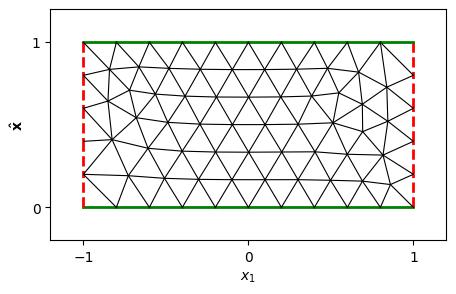

In [4]:
kappa_e = 8.
R = 1
H = 1.

Domain = Waveguide(R=R,H=H)

Domain.generate_mesh(h_max=H/5)
Domain.plot_mesh()

In [5]:
Nth = 15
V = TrefftzSpace(Domain=Domain, DOF_per_element=Nth, kappa= {"Omega_i" : kappa_e, "Omega_e" : kappa_e}, th0=0.)


In [6]:
N_DtN = 15
G = Assemble_blockMatrix(V, Edges=Domain.Edges, H=H, k=kappa_e, N_p=Nth, a = 1/2, b = 1/2, d_1=1/2, d_2=1/2, N_DtN=N_DtN )

In [7]:
A = AssembleMatrix( V, Edges=Domain.Edges, H=H, a = 1/2, b = 1/2, d_1 = 1/2, d_2 = 1/2, k = kappa_e, Np = N_DtN)

In [8]:
A_full = A.toarray()
G_full = G.toarray()
np.max(np.abs(A_full - G_full))

np.float64(1.831026719408895e-15)

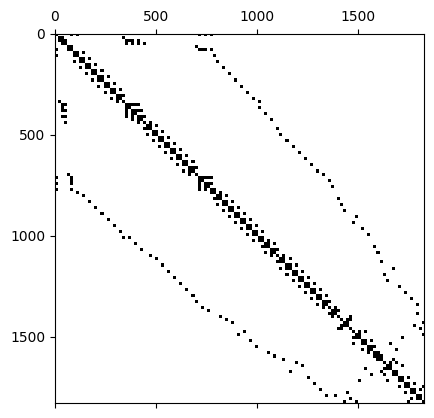

In [9]:
plt.spy(A_full)

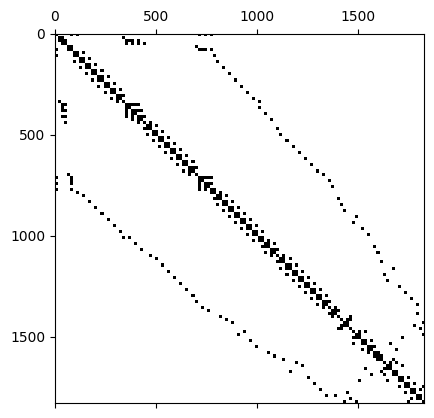

In [10]:
plt.spy(G_full)

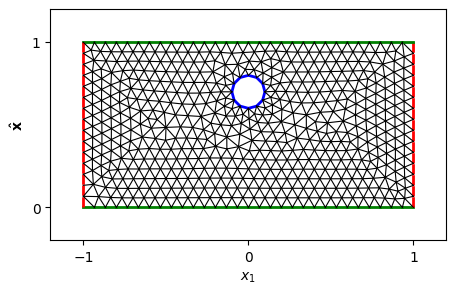

In [61]:
from domains import ScattererShape, ScattererType
kappa_e = 32.
R = 1
H = 1.

Domain = Waveguide(R=R,H=H)
Domain.add_scatterer(scatterer_shape=ScattererShape.CIRCLE, scatterer_type=ScattererType.SOUND_SOFT, params=[np.array([0,0.7*H]), 0.1*H])
Domain.generate_mesh(h_max=H/15)
Domain.plot_mesh()

In [62]:
Nth = 15
V = TrefftzSpace(Domain=Domain, DOF_per_element=Nth, kappa= {"Omega_i" : kappa_e, "Omega_e" : kappa_e}, th0=0.)
N_DtN = 15
A = Assemble_blockMatrix(V, Edges=Domain.Edges, H=H, k=kappa_e, N_p=Nth, a = 1/2, b = 1/2, d_1=1/2, d_2=1/2, N_DtN=N_DtN )

In [63]:
A = A.tocsr()

In [64]:
from Trefft_tools import AssembleGreenRHS_left, AssembleRHS

b = AssembleGreenRHS_left(V, Edges=Domain.Edges, k=kappa_e, H=H,d_2=1/2, x_0=-1.5*R, y_0=0.3*H, M=N_DtN)
b = AssembleRHS(V=V, Edges=Domain.Edges, k=kappa_e, H=H, d_2=1/2, t=0)

In [65]:
from scipy.sparse.linalg import spsolve as solve 
p = solve(A, b)

In [66]:
Ny = 300
Nx = int(R/H)*Ny
x = np.linspace(-R,R,Nx)
y = np.linspace(0,H, Ny)
X, Y = np.meshgrid(x,y)


from Trefft_tools import TrefftzFunction

f = TrefftzFunction(V, p)

U_tot = np.array([f(x,y) for (x,y) in zip(X.flatten(), Y.flatten())]).reshape(X.shape)

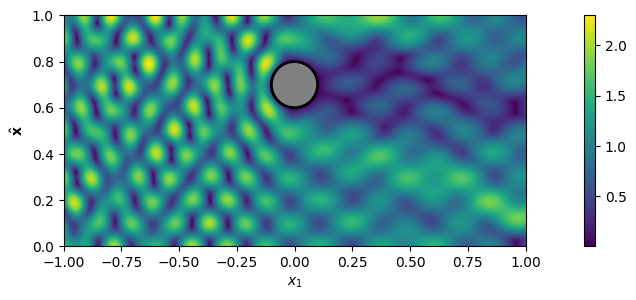

In [67]:
Domain.plot_field(X,Y,np.abs(U_tot))